In [107]:
# Manipulation des données
import pandas as pd
import numpy as np

# Affichage
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
# Charger le dataset
df = pd.read_csv("D:\Cardiovascular-Heart-Disease-Prediction-Model-master\Cardiovascular-Heart-Disease-Prediction-Model-master\datasetCleaned.csv")

# Vérifier les dimensions
print("Dimensions du dataset :", df.shape)


Dimensions du dataset : (70000, 13)


In [109]:
# Aperçu des données
df.head()


,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [110]:
# Liste des colonnes
df.columns


Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [111]:
# Suppression de la colonne index inutile
df = df.drop(columns=["Unnamed: 0"])

# Vérification
df.columns


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [112]:
# Conversion de l'âge en années
df["age_years"] = (df["age"] / 365.25).astype(int)

# Suppression de l'ancienne colonne
df = df.drop(columns=["age"])

# Vérification
df[["age_years"]]


,age_years
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [113]:
# Nettoyage médical strict
df = df[
    (df["height"] >= 120) & (df["height"] <= 220) &
    (df["weight"] >= 40) & (df["weight"] <= 200) &
    (df["ap_hi"] >= 70) & (df["ap_hi"] <= 300) &
    (df["ap_lo"] >= 40) & (df["ap_lo"] <= 200) &
    (df["ap_hi"] >= df["ap_lo"])
]

print("Dimensions après nettoyage :", df.shape)


Dimensions après nettoyage : (68574, 12)


In [114]:
df.isnull().sum()


gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [115]:
df.describe()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000,68574.000000
mean,1.348835,164.422667,74.139958,126.683554,81.313938,1.364832,1.225785,0.088007,0.053373,0.803293,0.494823,52.791174
std,0.476605,7.903169,14.269564,16.685482,9.449499,0.678996,0.571632,0.283307,0.224778,0.397512,0.499977,6.764630
min,1.000000,120.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,207.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


L’IMC est plus informatif que le poids seul pour le risque cardiovasculaire.

📐 Formule médicale
𝐵
𝑀
𝐼
=
𝑝
𝑜
𝑖
𝑑
𝑠
(
𝑘
𝑔
)
𝑡
𝑎
𝑖
𝑙
𝑙
𝑒
(
𝑚
)
2
BMI=
taille(m)
2
poids(kg)
	​


In [10]:
# Création de l'IMC
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)

# Vérification
df["bmi"].describe()


count    68574.000000
mean        27.464902
std          5.251191
min         13.520822
25%         23.875115
50%         26.346494
75%         30.119376
max        108.169847
Name: bmi, dtype: float64

🔹 3.3 — Créer un indicateur d’hypertension (flag clinique)
📌 Règle clinique standard

Hypertension si :

ap_hi ≥ 140 OU

ap_lo ≥ 90

In [11]:
# Pression pulsée
df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]

df["pulse_pressure"].describe()


count    68574.000000
mean        45.369615
std         11.666364
min          0.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: pulse_pressure, dtype: float64

In [12]:
# Groupes d'âge médicaux
df["age_group"] = pd.cut(
    df["age_years"],
    bins=[29, 39, 49, 59, 69, 120],
    labels=["30-39", "40-49", "50-59", "60-69", "70+"]
)

df["age_group"].value_counts()


age_group
50-59    34813
40-49    19409
60-69    12493
30-39     1856
70+          0
Name: count, dtype: int64

In [13]:
# Aperçu des nouvelles colonnes
df.head()

# Liste complète des colonnes
df.columns


Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'pulse_pressure', 'age_group'],
      dtype='object')

In [14]:
# ================================
# ETAPE 4 — DEFINITION DE X ET y
# ================================

X = df.drop(columns=["cardio"])
y = df["cardio"]

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)


Shape de X : (68574, 14)
Shape de y : (68574,)


In [15]:
# Vérifier que cardio n'est pas dans X
"cardio" in X.columns


False

In [16]:
# Distribution de la cible
y.value_counts(normalize=True)


cardio
0    0.505177
1    0.494823
Name: proportion, dtype: float64

In [17]:
# ================================
# ETAPE 5.1 — TYPES DE VARIABLES
# ================================

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numériques :", numeric_features)
print("Variables catégorielles :", categorical_features)


Variables numériques : ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'pulse_pressure']
Variables catégorielles : ['age_group']


In [18]:
# ================================
# ETAPE 5.4 — PREPROCESSOR
# ================================

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [19]:
# ================================
# ETAPE 6 — TRAIN / TEST SPLIT
# ================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    stratify=y,
    random_state=42
)

print("Train shape :", X_train.shape)
print("Test shape  :", X_test.shape)


Train shape : (58287, 14)
Test shape  : (10287, 14)


In [20]:
print("Distribution y_train :")
print(y_train.value_counts(normalize=True))

print("\nDistribution y_test :")
print(y_test.value_counts(normalize=True))


Distribution y_train :
cardio
0    0.505173
1    0.494827
Name: proportion, dtype: float64

Distribution y_test :
cardio
0    0.505201
1    0.494799
Name: proportion, dtype: float64


In [21]:
# ================================
# ETAPE 7.1 — PIPELINE BASELINE
# ================================

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        solver="lbfgs"
    ))
])


In [22]:
# ================================
# ETAPE 7.2 — ENTRAINEMENT
# ================================

baseline_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# ================================
# ETAPE 7.3 — PREDICTIONS
# ================================

y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]


In [24]:
# ================================
# ETAPE 7.4 — EVALUATION
# ================================

from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix
)

print("ROC-AUC :", roc_auc_score(y_test, y_proba))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred))


ROC-AUC : 0.7913240901789721

Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5197
           1       0.75      0.68      0.71      5090

    accuracy                           0.73     10287
   macro avg       0.73      0.73      0.73     10287
weighted avg       0.73      0.73      0.73     10287


Confusion Matrix :
[[4052 1145]
 [1640 3450]]


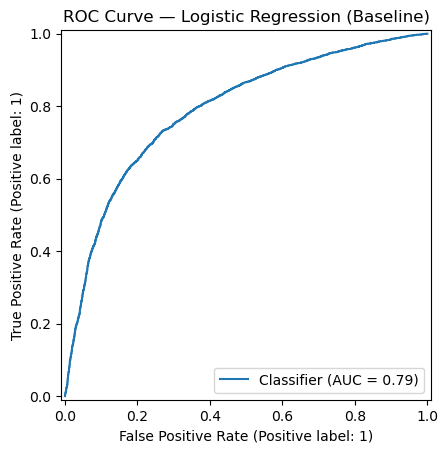

In [25]:
# ================================
# ETAPE 7.5 — COURBE ROC
# ================================

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve — Logistic Regression (Baseline)")
plt.show()


ÉTAPE 8 — MODÈLE AVANCÉ : RANDOM FOREST

In [26]:
# ================================
# ETAPE 8.1 — PIPELINE RANDOM FOREST
# ================================

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])


📌 Justification des hyperparamètres

n_estimators=300 → stabilité

max_depth=12 → évite l’overfitting

class_weight="balanced" → priorité médicale

min_samples_leaf → régularisation

In [27]:
# ================================
# ETAPE 8.2 — ENTRAINEMENT
# ================================

rf_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
# ================================
# ETAPE 8.3 — PREDICTIONS
# ================================

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [29]:
# ================================
# ETAPE 8.4 — EVALUATION
# ================================

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("ROC-AUC Random Forest :", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_rf))


ROC-AUC Random Forest : 0.800382039963361

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5197
           1       0.75      0.70      0.72      5090

    accuracy                           0.74     10287
   macro avg       0.74      0.74      0.74     10287
weighted avg       0.74      0.74      0.74     10287


Confusion Matrix :
[[4032 1165]
 [1547 3543]]


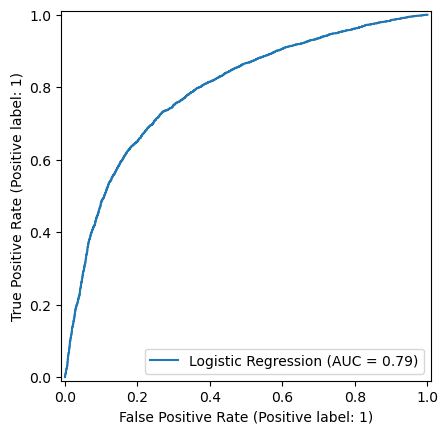

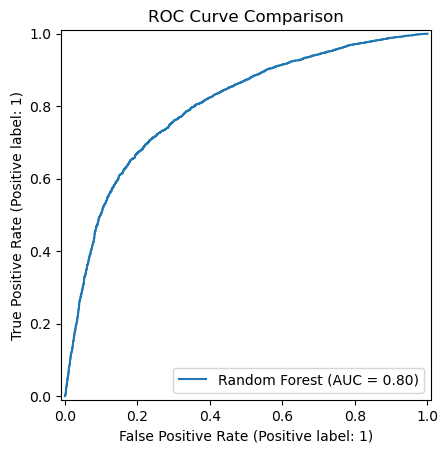

In [30]:
# ================================
# ETAPE 8.5 — COMPARAISON ROC
# ================================

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(
    y_test, y_proba, name="Logistic Regression"
)
RocCurveDisplay.from_predictions(
    y_test, y_proba_rf, name="Random Forest"
)

plt.title("ROC Curve Comparison")
plt.show()


🧠 Pourquoi on utilise le ROC en médecine ?

En santé :

On ne veut pas juste une prédiction 0 / 1

On veut savoir à quel point le modèle sépare bien les deux groupes

On veut pouvoir choisir le seuil plus tard (ex : être plus prudent)

👉 Le ROC est indépendant du seuil.

🔹 Les deux axes du ROC
📈 Axe Y — TPR (True Positive Rate)

Aussi appelé Sensibilité / Recall

𝑇
𝑃
𝑅
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
TPR=
TP+FN
TP
	​


➡️ Proportion de malades correctement détectés

📉 Axe X — FPR (False Positive Rate)
𝐹
𝑃
𝑅
=
𝐹
𝑃
𝐹
𝑃
+
𝑇
𝑁
FPR=
FP+TN
FP
	​


➡️ Proportion de non-malades mal classés comme malades

⚠️ Pourquoi le ROC est mieux que l’accuracy en médecine ?
Accuracy	ROC-AUC
Dépend du seuil	Indépendant du seuil
Trompeur si classes équilibrées	Robuste
Peu médical	Standard clinique

👉 En santé, on rapporte presque toujours le ROC-AUC.

🧠 Règle d’or à retenir

Accuracy = décision

ROC-AUC = capacité de discrimination

La relation entre ROC et AUC
La courbe ROC représente le taux de vrais positifs (TPR), également appelé rappel, par rapport au taux de faux positifs (FPR) pour différents seuils. L'AUC représente la probabilité qu'un exemple positif aléatoire soit classé plus haut qu'un exemple négatif aléatoire

In [31]:
param_distributions = {
    "classifier__n_estimators": [200, 300, 500],
    "classifier__max_depth": [8, 10, 12, 15, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 3, 5],
    "classifier__max_features": ["sqrt", "log2"]
}


In [32]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [33]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'classifier__max_depth': [8, 10, ...], 'classifier__max_features': ['sqrt', 'log2'], 'classifier__min_samples_leaf': [1, 3, ...], 'classifier__min_samples_split': [2, 5, ...], ...}"
,n_iter,30
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [34]:
best_model = random_search.best_estimator_

print("Meilleurs paramètres :")
print(random_search.best_params_)

print("Meilleur ROC-AUC (CV) :")
print(random_search.best_score_)


Meilleurs paramètres :
{'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': 10}
Meilleur ROC-AUC (CV) :
0.8005397160578358


In [35]:
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, classification_report

print("ROC-AUC final :", roc_auc_score(y_test, y_proba_best))
print(classification_report(y_test, y_pred_best))


ROC-AUC final : 0.8009075622818513
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5197
           1       0.75      0.70      0.72      5090

    accuracy                           0.74     10287
   macro avg       0.74      0.74      0.74     10287
weighted avg       0.74      0.74      0.74     10287



In [36]:
from sklearn.svm import SVC
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced",
        random_state=42
    ))
])


In [37]:
# Échantillon de 10 000 lignes pour test
X_train_sample = X_train.sample(10000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

svm_model.fit(X_train_sample, y_train_sample)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

print("ROC-AUC SVM :", roc_auc_score(y_test, y_proba_svm))
print(classification_report(y_test, y_pred_svm))


ROC-AUC SVM : 0.7867423513565519
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5197
           1       0.75      0.68      0.71      5090

    accuracy                           0.73     10287
   macro avg       0.73      0.73      0.73     10287
weighted avg       0.73      0.73      0.73     10287



In [40]:
# ================================
# ETAPE 10.1 — NOMS DES FEATURES
# ================================

feature_names = (
    best_model.named_steps["preprocessor"]
    .get_feature_names_out()
)


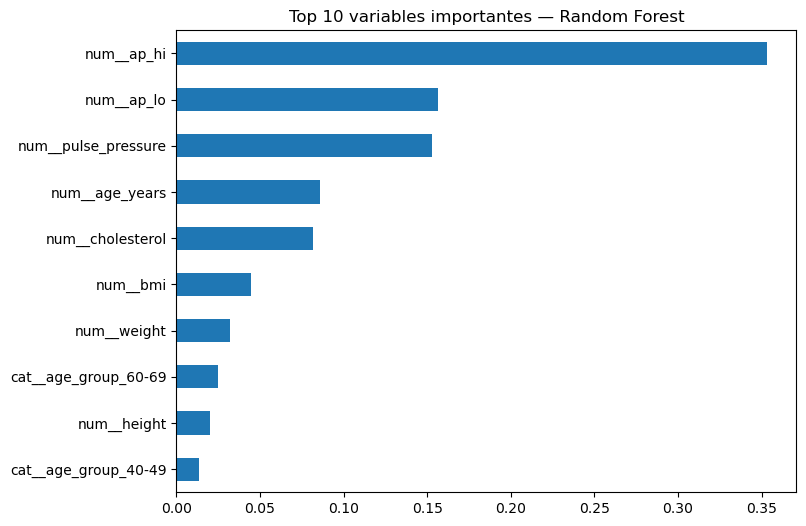

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.named_steps["classifier"].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind="barh")
plt.title("Top 10 variables importantes — Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [42]:
!pip install shap


In [43]:
import shap

explainer = shap.TreeExplainer(
    best_model.named_steps["classifier"]
)


In [45]:
shap_values = explainer.shap_values(X_test_transformed)


In [50]:
# Si tu as un ColumnTransformer
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()

# Transformer les données
X_test_transformed = best_model.named_steps["preprocessor"].transform(X_test)

# SHAP explainer
import shap
explainer = shap.TreeExplainer(best_model.named_steps["classifier"])
shap_values = explainer.shap_values(X_test_transformed)


In [51]:
print("shap_values[1].shape :", shap_values[1].shape)
print("X_test_transformed.shape :", X_test_transformed.shape)
print("len(feature_names) :", len(feature_names))


shap_values[1].shape : (17, 2)
X_test_transformed.shape : (10287, 17)
len(feature_names) : 17


In [52]:
y_proba = y_proba_best  # issu du modèle optimisé


In [53]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    
    results.append({
        "threshold": t,
        "recall": recall_score(y_test, y_pred_t),
        "precision": precision_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,threshold,recall,precision,f1
0,0.10,0.997839,0.501630,0.667631
1,0.15,0.988605,0.520050,0.681566
2,0.20,0.968173,0.544711,0.697178
3,0.25,0.935167,0.578935,0.715144
4,0.30,0.890177,0.621196,0.731751
5,0.35,0.844401,0.651311,0.735392
6,0.40,0.782515,0.695599,0.736501
7,0.45,0.740472,0.724390,0.732342
8,0.50,0.697250,0.754464,0.724729
9,0.55,0.642240,0.780005,0.704450


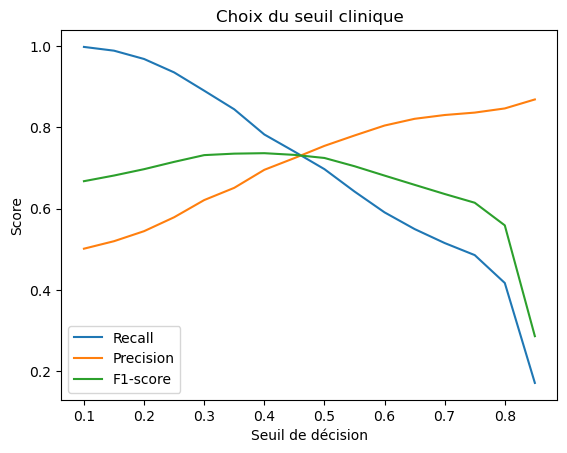

In [54]:
import matplotlib.pyplot as plt

plt.plot(results_df["threshold"], results_df["recall"], label="Recall")
plt.plot(results_df["threshold"], results_df["precision"], label="Precision")
plt.plot(results_df["threshold"], results_df["f1"], label="F1-score")
plt.xlabel("Seuil de décision")
plt.ylabel("Score")
plt.legend()
plt.title("Choix du seuil clinique")
plt.show()


In [55]:
# Seuil clinique choisi
clinical_threshold = 0.48

# Prédictions finales
y_pred_clinical = (y_proba_best >= clinical_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification report avec seuil 0.48 :")
print(classification_report(y_test, y_pred_clinical))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_clinical))


Classification report avec seuil 0.48 :
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5197
           1       0.74      0.71      0.73      5090

    accuracy                           0.73     10287
   macro avg       0.73      0.73      0.73     10287
weighted avg       0.73      0.73      0.73     10287

Matrice de confusion :
[[3914 1283]
 [1451 3639]]


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Créer les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "ANN (MLP)": MLPClassifier(hidden_layer_sizes=(64,32), activation="relu", solver="adam",
                               alpha=0.001, max_iter=300, early_stopping=True, random_state=42)
}

# Stocker les résultats
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_proba = pipeline.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= 0.48).astype(int)  # seuil clinique final
    
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n=== {name} ===")
    print("ROC-AUC:", round(roc_auc, 4))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    results.append({
        "Model": name,
        "ROC-AUC": roc_auc,
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df



=== Logistic Regression ===
ROC-AUC: 0.7913
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5197
           1       0.74      0.71      0.72      5090

    accuracy                           0.73     10287
   macro avg       0.73      0.73      0.73     10287
weighted avg       0.73      0.73      0.73     10287

Confusion Matrix:
 [[3895 1302]
 [1472 3618]]

=== Random Forest ===
ROC-AUC: 0.7644
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      5197
           1       0.69      0.72      0.71      5090

    accuracy                           0.70     10287
   macro avg       0.70      0.70      0.70     10287
weighted avg       0.70      0.70      0.70     10287

Confusion Matrix:
 [[3567 1630]
 [1430 3660]]

=== ANN (MLP) ===
ROC-AUC: 0.7984
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      5197
           1       0.74   

,Model,ROC-AUC,Recall,Precision,F1-score
0,Logistic Regression,0.791321,0.710806,0.735366,0.722877
1,Random Forest,0.764352,0.719057,0.691871,0.705202
2,ANN (MLP),0.798413,0.710216,0.738811,0.724231


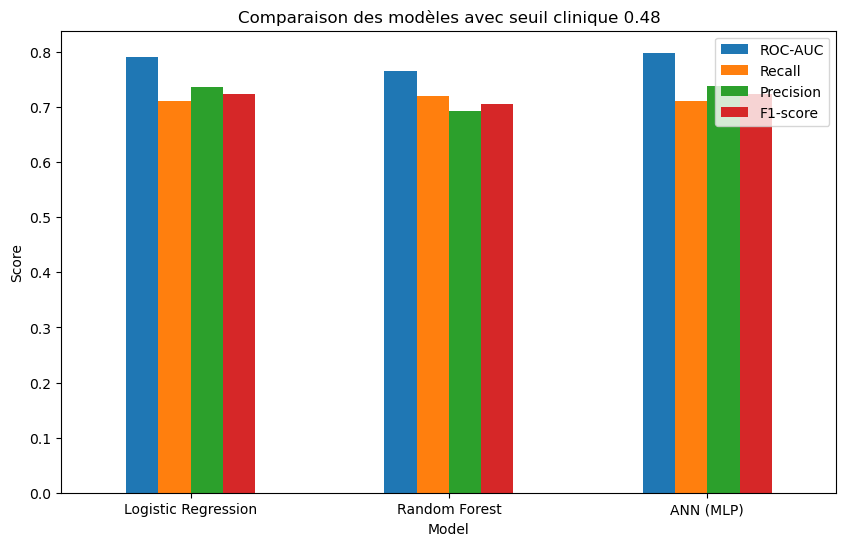

In [57]:
import matplotlib.pyplot as plt

results_df.set_index("Model")[["ROC-AUC","Recall","Precision","F1-score"]].plot(kind="bar", figsize=(10,6))
plt.title("Comparaison des modèles avec seuil clinique 0.48")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=0.001,
        max_iter=300,
        early_stopping=True,
        random_state=42
    ))
])

final_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [81]:
new_patient = pd.DataFrame([{
    "gender": 1,
    "height": 165,
    "weight": 75,
    "ap_hi": 100,
    "ap_lo": 60,
    "cholesterol": 1,
    "gluc": 1,
    "smoke": 0,
    "alco": 0,
    "active": 1,
    "age_years":24,
    "bmi": 27.5,
    "pulse_pressure": 50,
    "age_group": "50-59"
}])


In [82]:
risk_proba = final_model.predict_proba(new_patient)[0, 1]
clinical_threshold = 0.48

risk_label = int(risk_proba >= clinical_threshold)

print(f"Probabilité de maladie cardiovasculaire : {risk_proba:.2%}")

if risk_label == 1:
    print("⚠️ Patient À RISQUE cardiovasculaire")
else:
    print("✅ Patient NON à risque cardiovasculaire")


Probabilité de maladie cardiovasculaire : 0.91%
✅ Patient NON à risque cardiovasculaire


In [61]:
import shap

X_background = X_train.sample(100, random_state=42)
X_background_transformed = final_model.named_steps["preprocessor"].transform(X_background)

explainer = shap.KernelExplainer(
    final_model.named_steps["classifier"].predict_proba,
    X_background_transformed
)

new_patient_transformed = final_model.named_steps["preprocessor"].transform(new_patient)

shap_values = explainer.shap_values(new_patient_transformed)
feature_names = final_model.named_steps["preprocessor"].get_feature_names_out()


  0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
import joblib
from pathlib import Path

# Dossier du projet FastAPI
PROJECT_DIR = Path(r"C:\Users\Administrateur\PycharmProjects\PythonProject13")

# Chemin final du modèle
MODEL_PATH = PROJECT_DIR / "cardio_risk_model.pkl"

joblib.dump(final_model, MODEL_PATH)

print(f"✅ Modèle sauvegardé ici : {MODEL_PATH}")


✅ Modèle sauvegardé ici : C:\Users\Administrateur\PycharmProjects\PythonProject13\cardio_risk_model.pkl
